**STocks_prediction_2024**

In [27]:
#import dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [28]:
start ='2010-01-01'
end='2024-10-30'

stock= "TSLA"
data= yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [29]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...,...
3604,2024-10-23,213.649994,213.649994,218.720001,212.110001,217.130005,80938900
3605,2024-10-24,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
3606,2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900


**MOving_Average_100Day**


In [30]:
ma_100_d =data.Close.rolling(160).mean()


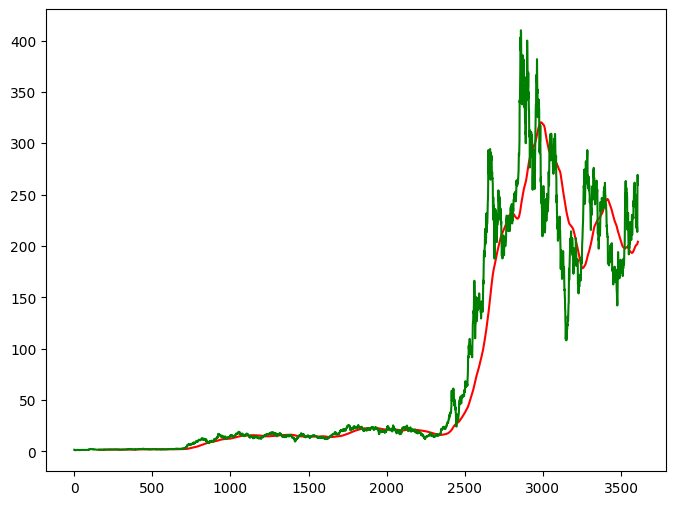

In [31]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_d, 'r')
plt.plot(data.Close,'g')
plt.show()

In [32]:
ma_200_d =data.Close.rolling(200).mean()


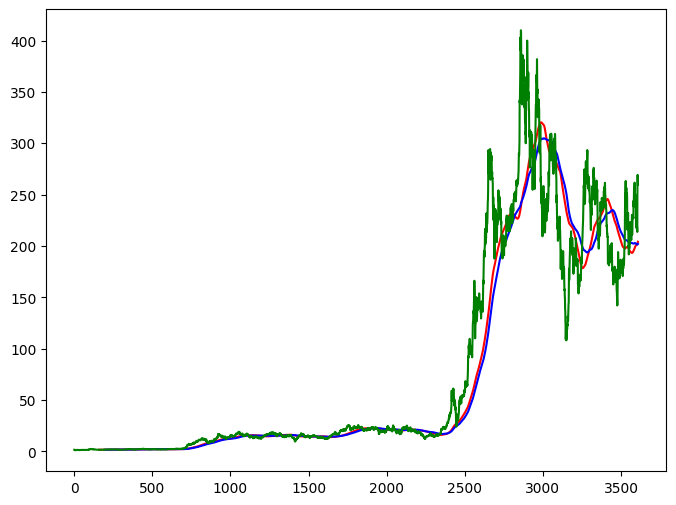

In [33]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_d ,'r')
plt.plot(ma_200_d ,'b')
plt.plot(data.Close,'g')
plt.show()



In [34]:
data.dropna(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...,...
3604,2024-10-23,213.649994,213.649994,218.720001,212.110001,217.130005,80938900
3605,2024-10-24,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
3606,2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900


In [35]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [36]:
data_train.shape[0]

2887

In [37]:
data_test.shape[0]

722

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [39]:
data_train_scale = scaler.fit_transform(data_train)

In [40]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [41]:
x,y =np.array(x) ,np.array(y)

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
model= Sequential()
model.add(LSTM(units =50, activation ='relu', return_sequences =True ,
              input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units =60 , activation ='relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units =80 , activation ='relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units =120 , activation ='relu' , return_sequences= True))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [44]:
model.compile(optimizer = 'adam' ,loss ='mean_squared_error')

In [45]:
model.fit(x,y, epochs =50 , batch_size =32 ,verbose =1)

Epoch 1/50
88/88 [==============================] - 63s 561ms/step - loss: 0.0335
Epoch 2/50
88/88 [==============================] - 47s 536ms/step - loss: 0.0331
Epoch 3/50
88/88 [==============================] - 46s 524ms/step - loss: 0.0330
Epoch 4/50
88/88 [==============================] - 1041s 12s/step - loss: 0.0330
Epoch 5/50
88/88 [==============================] - 45s 509ms/step - loss: 0.0330
Epoch 6/50
88/88 [==============================] - 46s 527ms/step - loss: 0.0330
Epoch 7/50
88/88 [==============================] - 49s 557ms/step - loss: 0.0329
Epoch 8/50
88/88 [==============================] - 46s 524ms/step - loss: 0.0329
Epoch 9/50
88/88 [==============================] - 47s 537ms/step - loss: 0.0330
Epoch 10/50
88/88 [==============================] - 4175s 48s/step - loss: 0.0330
Epoch 11/50
88/88 [==============================] - 43s 487ms/step - loss: 0.0329
Epoch 12/50
88/88 [==============================] - 47s 529ms/step - loss: 0.0329
Epoch 13/50
8

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [47]:
pas_100_d =data_train.tail(100)

In [48]:
data_test =pd.concat([pas_100_d, data_test], ignore_index =True)
data_test_scale = scaler.fit_transform(data_test)

In [49]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y =np.array(x), np.array(y)

In [50]:
y_predict =model.predict(x)

23/23 [==============================] - 5s 136ms/step


In [51]:
scale =1/scaler.scale_

In [52]:
y_predict = y_predict*scale

In [53]:
y =y*scale

**in plotting graph**

In [62]:
# Debugging: Print summary statistics
print("y_predict summary (before aggregation):")
print(f"Min: {y_predict.min()}, Max: {y_predict.max()}, Mean: {y_predict.mean()}, Std: {y_predict.std()}")

print("y summary:")
print(f"Min: {y.min()}, Max: {y.max()}, Mean: {y.mean()}, Std: {y.std()}")

# Step 1: Aggregation of y_predict
# Option 1: Use the first prediction from each time step
#y_predict_flattened = y_predict[:, 0, 0]  # Shape (747,)

# Option 2: Weighted average or median (alternative)
y_predict_flattened = np.mean(y_predict.reshape(747, 100), axis=1)  # Mean aggregation
y_predict_flattened = np.median(y_predict.reshape(747, 100), axis=1)  # Median aggregation

# Debugging: Verify shapes and first few values
print("Shape of y_predict_flattened:", y_predict_flattened.shape)
print("First 10 values of y_predict_flattened:", y_predict_flattened[:10])
print("First 10 values of y:", y[:10])

# Step 2: Normalize data (optional)
y_predict_normalized = (y_predict_flattened - y_predict_flattened.min()) / (y_predict_flattened.max() - y_predict_flattened.min())
y_normalized = (y - y.min()) / (y.max() - y.min())

# Step 3: Plot
plt.figure(figsize=(10, 8))

# Plot normalized data for better comparison
plt.plot(y_predict_normalized, 'r', label='Predicted Price (Normalized)')
plt.plot(y_normalized, 'g', label='Original Price (Normalized)')

# Finalize the plot
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Improved Comparison of Predicted and Original Prices')
plt.show()


y_predict summary (before aggregation):
Min: 28.79322475144221, Max: 34.766121413379665, Mean: 32.57597482574498, Std: 1.5574441658394858
y summary:
Min: 0.0, Max: 291.82666778564453, Mean: 123.14886108990191, Std: 53.46048411714148


ValueError: cannot reshape array of size 72200 into shape (747,100)

In [ ]:
model.save('Stock Prediction1 Model TSLA.keras')

**end of code**
**Thank you**